# CIFAR examples

This code runs CIFAR10 and CIFAR100. To switch between these two datasets, update the `dataset` field in `train_config.yaml` and the `data_path` field in `audit.yaml` accordingly.


In [2]:
import os
import sys
import yaml

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)


In [3]:

from examples.mia.cifar.utils.cifar_data_preparation import get_cifar_dataloader
from examples.mia.cifar.utils.cifar_model_preparation import ResNet18, create_trained_model_and_metadata


# Load the config.yaml file
with open('train_config.yaml', 'r') as file:
    train_config = yaml.safe_load(file)

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), train_config["data"]["data_dir"])

In [4]:
train_loader, test_loader = get_cifar_dataloader(path, train_config)

100%|██████████| 170498071/170498071 [00:08<00:00, 20661265.59it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Save data to data/cifar10.pkl.pkl


In [5]:
# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
if train_config["data"]["dataset"] == "cifar10":
    num_classes = 10
elif train_config["data"]["dataset"] == "cifar100":
    num_classes = 100
else:
    raise ValueError("Invalid dataset name")

model = ResNet18(num_classes = num_classes)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
                                                                               train_loader, 
                                                                               test_loader, 
                                                                               train_config)

/home/fazeleh/miniconda3/envs/leakpro_test/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fazeleh/miniconda3/envs/leakpro_test/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Training Progress: 100%|██████████| 3/3 [00:06<00:00,  2.16s/it]


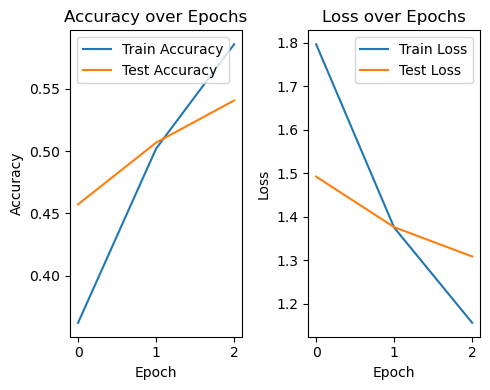

In [6]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
from cifar_handler import CifarInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(CifarInputHandler, config_path)

# Run the audit 
leakpro.run_audit()

2024-10-18 09:39:40,722 INFO     Target model blueprint created from ResNet18 in ./utils/cifar_model_preparation.py.
2024-10-18 09:39:40,727 INFO     Loaded target model metadata from ./target/model_metadata.pkl


{'audit': {'random_seed': 1234, 'attack_list': {'rmia': {'training_data_fraction': 0.5, 'attack_data_fraction': 0.5, 'num_shadow_models': 3, 'online': True, 'temperature': 2, 'gamma': 2.0, 'offline_a': 0.33, 'offline_b': 0.66}, 'qmia': {'training_data_fraction': 1.0, 'epochs': 5}, 'population': {'attack_data_fraction': 1.0}, 'lira': {'training_data_fraction': 0.5, 'num_shadow_models': 8, 'online': False, 'fixed_variance': True, 'boosting': True}, 'loss_traj': {'training_distill_data_fraction': 0.7, 'number_of_traj': 10, 'label_only': False, 'mia_classifier_epochs': 100}, 'HSJ': {'attack_data_fraction': 0.01, 'target_metadata_path': './target/model_metadata.pkl', 'num_iterations': 2, 'initial_num_evals': 100, 'max_num_evals': 10000, 'stepsize_search': 'geometric_progression', 'gamma': 1.0, 'constraint': 2, 'batch_size': 50, 'verbose': True, 'epsilon_threshold': '1e-6'}}, 'output_dir': './leakpro_output', 'attack_type': 'mia', 'modality': 'image'}, 'target': {'module_path': './utils/cifa

/home/fazeleh/miniconda3/envs/leakpro_test/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fazeleh/miniconda3/envs/leakpro_test/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
2024-10-18 09:39:40,895 INFO     Loaded target model from ./target
2024-10-18 09:39:41,860 INFO     Loaded population dataset from ./data/cifar10.pkl
2024-10-18 09:39:41,861 INFO     Loaded population dataset from ./data/cifar10.pkl
2024-10-18 09:39:46,076 INFO     Creating shadow model handler singleton
2024-10-18 09:40:42,335 INFO     Created folder ./leakpro_output/attack_objects/shadow_model
2024-10-18 09:40:42,338 INFO